In [1]:
import numpy as np
from pathlib import Path


digits_dir = Path('./datasets/sprites/interface/text/digits')

print('Welcome!')
for f in digits_dir.glob('*'):
    print(f)

Welcome!
datasets/sprites/interface/text/digits/9.png
datasets/sprites/interface/text/digits/8.png
datasets/sprites/interface/text/digits/7.png
datasets/sprites/interface/text/digits/6.png
datasets/sprites/interface/text/digits/5.png
datasets/sprites/interface/text/digits/2.png
datasets/sprites/interface/text/digits/4.png
datasets/sprites/interface/text/digits/1.png
datasets/sprites/interface/text/digits/3.png
datasets/sprites/interface/text/digits/0.png


Original digits in greyscale
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)
shape:  (7, 7)


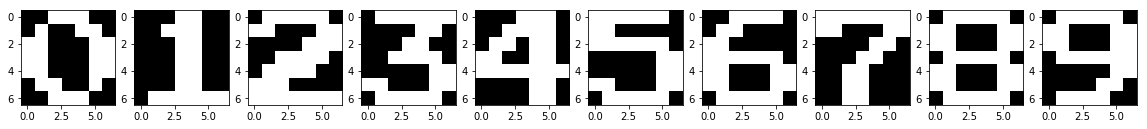

In [3]:
from matplotlib import pyplot as pl
import cv2
files = sorted(list(digits_dir.glob('*.png')))

print('Original digits in greyscale')
fig_size = 20
pl.figure(figsize=(fig_size,fig_size))
digits = {}
for i, file in enumerate(files):
    pl.subplot(1, 10, i+1)
    
    digit = cv2.imread(str(file))
    digit = cv2.cvtColor(digit, cv2.COLOR_BGR2GRAY)
    _ , digits[i] = cv2.threshold(digit, 250, 1, cv2.THRESH_BINARY)
    print('shape: ', digit.shape)
    pl.imshow(digit, cmap='gray')
pl.show()

# Hello
what's up

In [4]:
digit_ind = {}
digit_rev_ind = {}
for digit, digit_repr in digits.items():
    print('digit: ',digit)
    # print('representation')
    #print(digit_repr)
    d = tuple(sorted(
            zip(*np.where(digit_repr == 1))
            ))
    
    print(d)
    digit_ind[digit] = d
    digit_rev_ind[d] = digit
    print()


digit:  0
((0, 2), (0, 3), (0, 4), (1, 1), (1, 4), (1, 5), (2, 0), (2, 1), (2, 5), (2, 6), (3, 0), (3, 1), (3, 5), (3, 6), (4, 0), (4, 1), (4, 5), (4, 6), (5, 1), (5, 2), (5, 5), (6, 2), (6, 3), (6, 4))

digit:  1
((0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 3), (3, 4), (4, 3), (4, 4), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6))

digit:  2
((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (5, 0), (5, 1), (5, 2), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6))

digit:  3
((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 4), (1, 5), (2, 3), (2, 4), (3, 2), (3, 3), (3, 4), (3, 5), (4, 5), (4, 6), (5, 0), (5, 1), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5))

digit:  4
((0, 3), (0, 4), (0, 5), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 4), (2, 5), (3, 0), (3, 1), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4

In [5]:
test =  [   
    [str(int(x == y)) for y in digit_ind.values()]
    for x in digit_ind.values() 
] 
for t in test:
    print(' '.join(t))

print((0, 1) == (0, 1))
print((0, 1) == (1, 0))
print((0,) == (0, 0))

1 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 1
True
False
False


In [ ]:


from matplotlib import pyplot as pl


import cv2

print('Rescaled versions')
fig_size = 30

for pix_val in range(2,7):
    num_pixels = []
    pl.figure(figsize=(fig_size,fig_size))
    for i, file in enumerate(files):
        col = i % 5    
        row = int((i - col)/5)
        pl.subplot(1, 10, i+1)
        
        dp = cv2.imread(str(file))
        dp = cv2.cvtColor(dp, cv2.COLOR_BGR2GRAY)
        thresh, dp = cv2.threshold(dp, 250, 255, cv2.THRESH_BINARY, dp)
        dp = cv2.resize(dp, dsize=(pix_val-1, pix_val), interpolation=cv2.INTER_NEAREST)
        pl.imshow(dp, cmap='gray')
        num_pixels.append(int(dp.sum()/255))
    
    print(num_pixels, len(num_pixels), len(set(num_pixels)))
    pl.show()


1 0 0 0 0 0 0 0 0 0
0 1 0 0 0 0 0 0 0 0
0 0 1 0 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
0 0 0 0 1 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 1 0 0 0
0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 1
True
False
False


predicted: [0]  true: 0  same: [ True], 24
predicted: [1]  true: 1  same: [ True], 19
predicted: [2]  true: 2  same: [ True], 30
predicted: [3]  true: 3  same: [ True], 25
predicted: [4]  true: 4  same: [ True], 26
predicted: [5]  true: 5  same: [ True], 27
predicted: [6]  true: 6  same: [ True], 27
predicted: [7]  true: 7  same: [ True], 21
predicted: [8]  true: 8  same: [ True], 31
predicted: [9]  true: 9  same: [ True], 27
[  0 255 255 255 255 255   0 255 255   0   0   0 255 255 255 255   0   0
   0 255 255   0 255 255 255 255 255 255   0   0   0   0   0 255 255   0
   0   0   0 255 255   0   0 255 255 255 255   0   0]


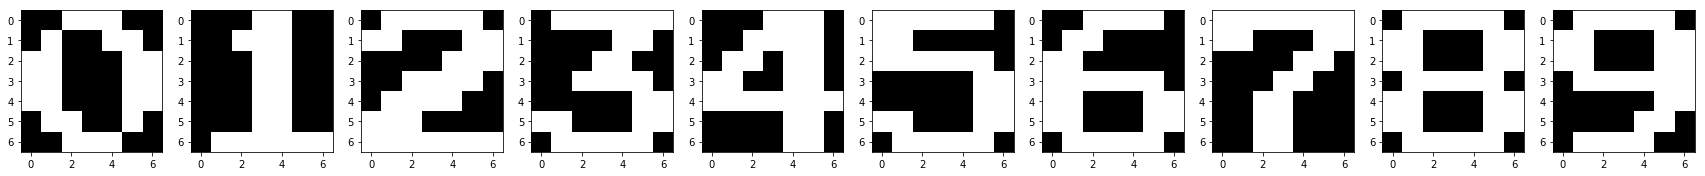

In [5]:
from sklearn import tree
import numpy as np

files = sorted(list(digits_dir.glob('*.png')))

classifier = tree.DecisionTreeClassifier()

x = []
y = []

fig_size=30
pl.figure(1, (fig_size, fig_size))

for i, file in enumerate(files):
    dp = cv2.imread(str(file))
    dp = cv2.cvtColor(dp, cv2.COLOR_BGR2GRAY)
    thresh, dp = cv2.threshold(dp, 245, 255, cv2.THRESH_BINARY)
    #dp = cv2.resize(dp, dsize=(1, 5), interpolation=cv2.INTER_NEAREST)
    x.append(dp.flatten())
    y.append(i)
    
    pl.subplot(1, 10, i+1)
    pl.imshow(dp, cmap='gray')

classifier.fit(x, y)

for x_samp, y_samp in zip(x, y):
    pred = classifier.predict([x_samp])
    label = y_samp
    print(f'predicted: {pred}  true: {label}  same: {pred == label}, {int(sum(x_samp)/255)}')

print(x_samp)


In [6]:
import pickle
classifier
with open('./lab/ml/digit_classifier.pkl', 'wb') as p:
    pickle.dump(classifier, p)

In [121]:
from itertools import product
orig_size = (7,7)
size = 12
x_mod = [cv2.resize(y.reshape(orig_size), (3,4), interpolation=cv2.INTER_NEAREST).flatten() for y in x]
x_mod = [(y//255) for y in x_mod]
x_a = np.array(x_mod)

fig_size = 20
pl.figure(1, (fig_size, fig_size))
DO_PLOT = False
for i, j in product(range(10), range(10)):
    diff = (x_a[i] - x_a[j])
    if DO_PLOT:
        pl.subplot(10, 10, (10*j)+i+1)
        pl.imshow(diff.reshape(2,2), cmap='gray')
    if sum(diff) == 0:
        print(i, j, sum(diff))
        

0 0 0
1 1 0
2 2 0
3 3 0
4 4 0
5 5 0
6 6 0
7 7 0
8 8 0
9 9 0


<Figure size 1440x1440 with 0 Axes>

In [123]:
oracle = dict()
for digit, digit_img in enumerate(x_a):
    print(digit)
    digit_repr = "".join(map(str, digit_img))
    print('repr: ', digit_repr, 'integer: ', int(digit_repr, 2))
    oracle[digit_repr] = digit

0
repr:  011001100010 integer:  1634
1
repr:  001011001001 integer:  713
2
repr:  011100011110 integer:  1822
3
repr:  011001011100 integer:  1628
4
repr:  001011101001 integer:  745
5
repr:  111100000100 integer:  3844
6
repr:  011010111100 integer:  1724
7
repr:  111100001010 integer:  3850
8
repr:  011100011100 integer:  1820
9
repr:  011100011001 integer:  1817


In [124]:
print(oracle)

{'011001100010': 0, '001011001001': 1, '011100011110': 2, '011001011100': 3, '001011101001': 4, '111100000100': 5, '011010111100': 6, '111100001010': 7, '011100011100': 8, '011100011001': 9}
